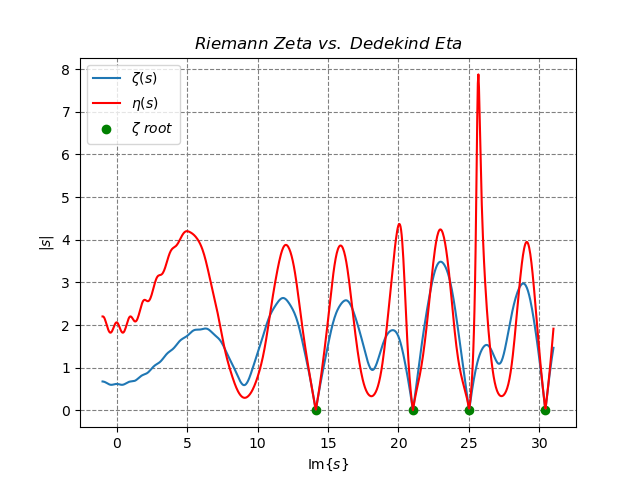

In [1]:
# riemann_hypothesis.ipynb
# Cell 1

import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

# eta function where n is term number
def eta_term(s: complex, n: int) -> complex:
    return complex(1 / np.power(n, s))


vec_eta_term = np.vectorize(eta_term)


def fn_eta(s: complex) -> complex:
    terms = int(1000)
    eta = (
        complex(1)
        - np.sum(vec_eta_term(s, np.arange(2, terms, 2, dtype=int)))#passes in an array of numbers starting at 2 by 2l subtracting even terms
        + np.sum(vec_eta_term(s, np.arange(3, terms, 2, dtype=int)))# adds the odd terms
    )
    return eta


def fn_zeta_from_eta(s: complex) -> complex:
    return s / (1.0 - np.power(2, 1.0 - s))


def plot(ax):
    xa = np.linspace(-1, 31, 800)
    xz = [complex(0.5, i) for i in xa]

    eta = [fn_eta(s) for s in xz]
    zeta = [fn_zeta_from_eta(s) for s in eta]

    ax.plot(xa, np.absolute(eta), label=r"$\zeta \left( s \right)$")
    ax.plot(xa, np.absolute(zeta), label=r"$\eta \left( s \right)$", color="red")

    zeta_zeros_im = [14.134725141, 21.022039638, 25.010857580, 30.424876125]
    ax.scatter(
        zeta_zeros_im,
        [0] * len(zeta_zeros_im),
        marker="o",
        color="green",
        label=r"$\zeta\ root$",
    )

    ax.set_title(r"$Riemann\ Zeta\ vs.\ Dedekind\ Eta$")
    ax.set_xlabel(r"$\mathrm{Im}\{s\}$")
    ax.set_ylabel(r"$\left|s\right\|$")
    ax.legend(loc="best")
    ax.set_axisbelow(True)
    ax.grid(color="gray", linestyle="dashed")


def plot_riemann_zeta(zoom=False):
    plt.close("all")
    fig = plt.figure(" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()


plot_riemann_zeta()